# Inisialisasi dan Load Dataset
Tahap ini memuat library yang dibutuhkan dan membaca dataset utama yang digunakan untuk analisis. Dataset berisi data mahasiswa dari Jaya Jaya Institut, termasuk status akademik, performa semester awal, dan variabel sosial ekonomi.


In [292]:
import pandas as pd

df = pd.read_csv('/content/data.csv', sep=';')
df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding dan EDA Awal
Pada tahap ini dilakukan eksplorasi data awal, termasuk pengecekan dimensi dataset, struktur kolom, tipe data, dan distribusi kategori target (`Status`). EDA awal membantu mengidentifikasi ketidakseimbangan kelas serta potensi insight awal sebelum preprocessing.


In [293]:
# Cek dimensi dataset
print("Jumlah baris dan kolom:", df.shape)

# Info tipe data & missing values
df.info()

# Lihat 5 baris pertama
df.head()


Jumlah baris dan kolom: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification       

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [294]:
# Cek jumlah masing-masing status
df['Status'].value_counts()


,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


# Data Cleaning & Preprocessing
Tahapan ini fokus pada:
- Menangani missing values (jika ada)
- Menghapus kolom yang tidak relevan
- Encoding data kategorikal
- Normalisasi fitur numerik menggunakan StandardScaler

Langkah ini bertujuan menyiapkan data agar sesuai format input untuk model machine learning.


In [295]:
df.isnull().sum()


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [296]:
df.describe()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [297]:
low_cardinality_cols = [col for col in df.columns if df[col].nunique() <= 10]
print("Kolom kandidat kategorikal:", low_cardinality_cols)


Kolom kandidat kategorikal: ['Marital_status', 'Application_order', 'Daytime_evening_attendance', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']


In [298]:
drop_cols = ['Application_mode', 'Application_order', 'Daytime_evening_attendance', 'Nacionality']
df.drop(columns=drop_cols, inplace=True)


In [299]:
df_raw = df.copy()


In [300]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])  # Graduate, Dropout, Enrolled → 0/1/2


In [301]:
categorical_cols = df.select_dtypes(include='object').columns.drop('Status')  # kecuali kolom target asli

from sklearn.preprocessing import LabelEncoder
le_cat = LabelEncoder()

for col in categorical_cols:
    df[col] = le_cat.fit_transform(df[col])


In [302]:
from sklearn.preprocessing import StandardScaler

# Drop kolom target dari kolom numerik
numerical_cols = df.select_dtypes(include='int64').columns.drop('Status_encoded')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [303]:
df_looker = df.copy()
df_looker['Gender'] = df_raw['Gender'].map({0: 'Female', 1: 'Male'})
df_looker['Scholarship_holder'] = df_raw['Scholarship_holder'].map({0: 'No', 1: 'Yes'})
df_looker['Tuition_fees_up_to_date'] = df_raw['Tuition_fees_up_to_date'].map({0: 'Not yet', 1: 'Paid'})
df_looker['Status'] = df['Status_encoded'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


In [304]:
# Drop kolom yang tidak dipakai
df_looker.drop(columns=['Status_encoded'], inplace=True)

# Simpan ke CSV baru
df_looker.to_csv('df_looker_studio_clean.csv', index=False)

from google.colab import files
files.download('df_looker_studio_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [305]:
print("Shape fitur:", X.shape)
print("Shape label:", y.shape)
X.head()
y.value_counts()


Shape fitur: (4424, 6)
Shape label: (4424,)


,count
Status_encoded,
2,2209
0,1421
1,794


# Feature Selection & Correlation Analysis

Analisis korelasi dilakukan untuk mengetahui seberapa besar hubungan antara fitur dan target (`Dropout`). Korelasi ini digunakan untuk membantu pemilihan fitur yang relevan dan mengurangi noise sebelum pemodelan.

In [306]:
selected_features = [
    'Age_at_enrollment',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Admission_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved'
]

X = df[selected_features]
y = df['Status_encoded']


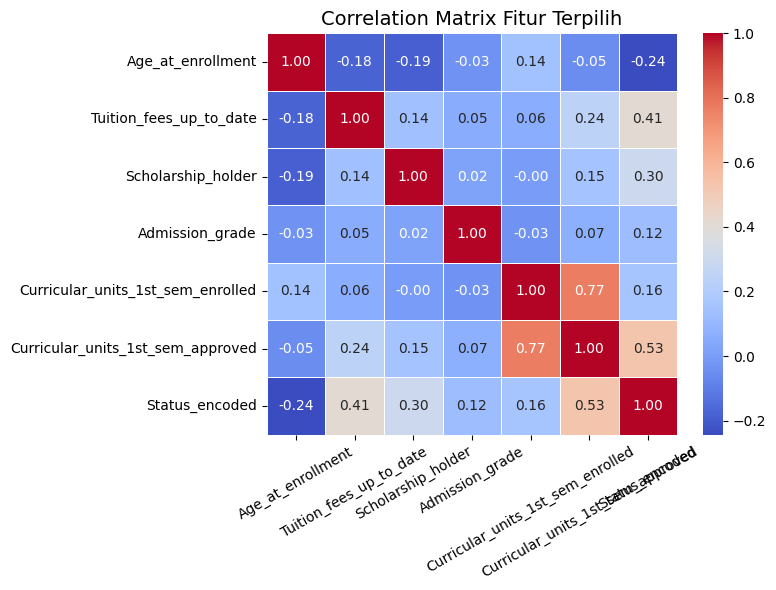

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fokus pada fitur yang digunakan dalam modeling
selected_features = [
    'Age_at_enrollment',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Admission_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Status_encoded'
]

# Hitung korelasi hanya untuk kolom terpilih
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Fitur Terpilih", fontsize=14)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Modeling & Evaluation
Model klasifikasi dibangun menggunakan algoritma seperti Logistic Regression. Dataset dibagi menjadi data latih dan uji. Hasil evaluasi ditampilkan dalam bentuk:
- Confusion matrix
- Classification report (precision, recall, f1-score)
- Akurasi total model

Tujuannya adalah mengukur seberapa baik model mampu memprediksi status mahasiswa.

In [308]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [309]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000
)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

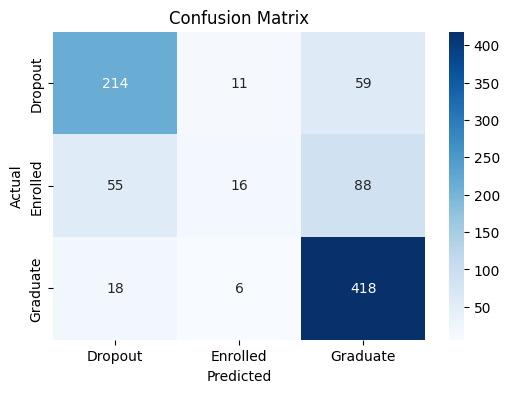

              precision    recall  f1-score   support

     Dropout       0.75      0.75      0.75       284
    Enrolled       0.48      0.10      0.17       159
    Graduate       0.74      0.95      0.83       442

    accuracy                           0.73       885
   macro avg       0.66      0.60      0.58       885
weighted avg       0.70      0.73      0.69       885



In [310]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))


# Simpan Model ke .pkl (Pickle Format)

Model yang telah dilatih disimpan dalam format pickle (`.pkl`) agar dapat digunakan kembali dalam aplikasi berbasis Streamlit. Hal ini memungkinkan deployment dan pengujian ulang tanpa perlu melatih model dari awal.



In [311]:
import pickle

# Simpan model
with open('student_dropout_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [312]:
# Simpan label encoder jika nanti mau tampilkan nama kelas hasil prediksi
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [313]:
from google.colab import files
files.download('student_dropout_model.pkl')
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>